In [3]:
import sys
sys.path.insert(0, "../")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mcfa import (mcfa, mpl_utils)

%matplotlib inline

In [4]:
# Load the Iris data.
X = load_iris().data

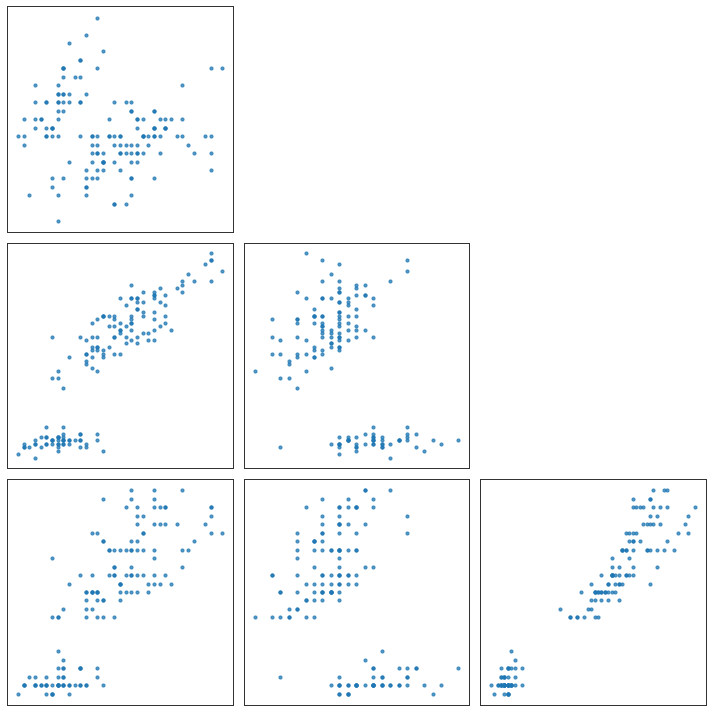

In [5]:
# Plot the data as a corner plot.
fig = mpl_utils.corner_scatter(X, s=10, alpha=0.75, figsize=(10, 10))

In [6]:
model = mcfa.MCFA(n_components=3, n_latent_factors=3, verbose=1)
model.fit(X)

In [7]:
for parameter_name, value in dict(zip(model.parameter_names, model.theta_)).items():
    print("{}: {}\n{}".format(parameter_name, value.shape, value))

pi: (3,)
[ 0.36149885  0.33333333  0.30516782]
A: (4, 3)
[[-0.7521328  -0.28359203  0.36556429]
 [-0.38036055 -0.54487303 -0.53344607]
 [-0.51182008  0.70929124  0.1047415 ]
 [-0.1663199   0.34582492 -0.75553111]]
xi: (3, 3)
[[-9.19206092 -5.85544611 -7.88028376]
 [ 1.11585906 -2.15941555  0.24877977]
 [-0.10418586 -0.02261976  0.12875043]]
omega: (3, 3, 3)
[[[  6.35168919e-01   1.38581645e-01   4.47905659e-01]
  [ -1.31394451e-01   7.67147432e-02  -6.21414553e-02]
  [ -4.96903423e-02   2.72880265e-02   1.00368494e-03]]

 [[ -1.31394451e-01   7.67147432e-02  -6.21414553e-02]
  [  5.28532883e-02   5.30146194e-02   1.55024555e-02]
  [  1.19906787e-02   1.16003290e-02   9.40554750e-05]]

 [[ -4.96903423e-02   2.72880265e-02   1.00368494e-03]
  [  1.19906787e-02   1.16003290e-02   9.40554750e-05]
  [  1.01068787e-01   9.15559144e-03   1.54235452e-02]]]
psi: (4,)
[ 0.04879969  0.04169345  0.02578378  0.00377184]


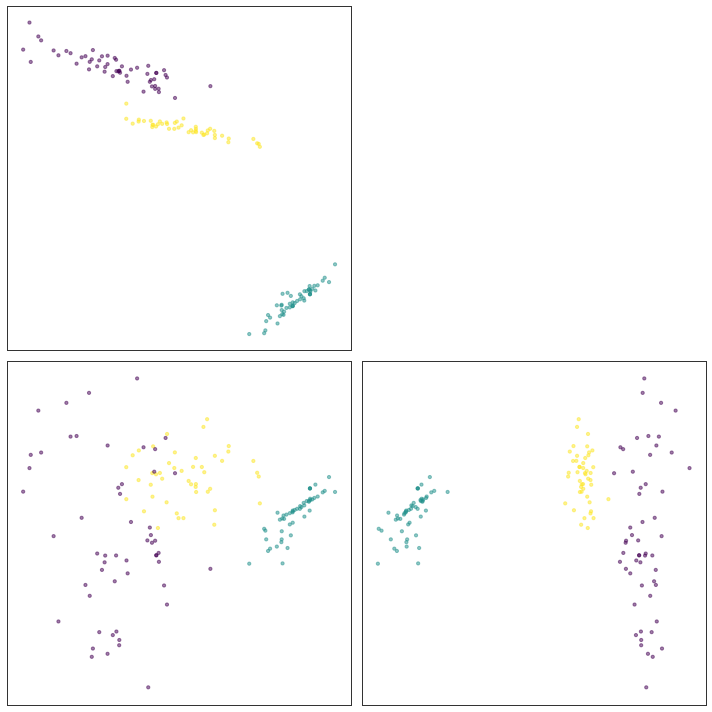

In [8]:
# Plot the estimated posterior factor scores.
#fig = mpl_utils.corner_scatter(X, s=10, alpha=0.75, figsize=(10, 10))
v, v_cluster, v_mean = model.factor_scores(X)

# Associations
hard_associations = np.argmax(model.tau_, axis=1)

fig = mpl_utils.corner_scatter(v_mean, c=hard_associations, figsize=(10, 10), s=10)

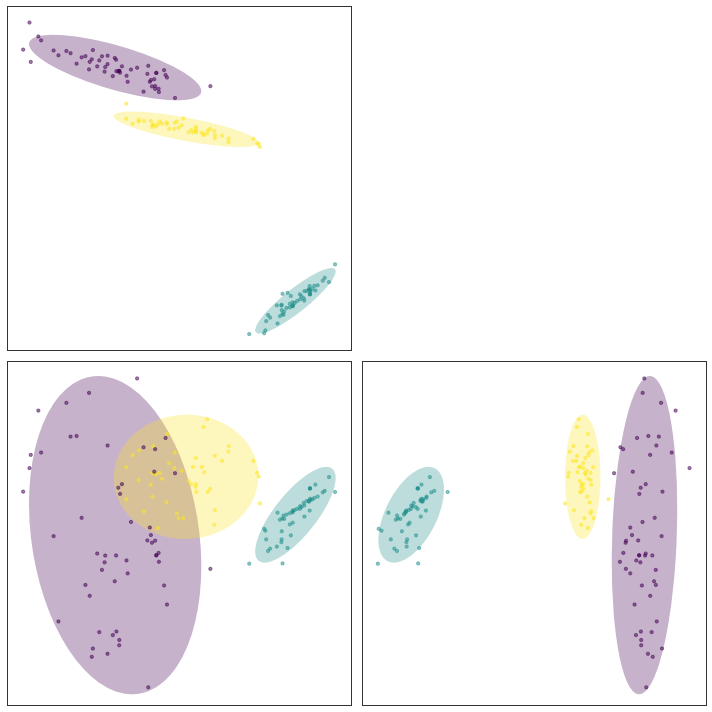

In [9]:
fig = model.plot_latent_space(X, s=10, figsize=(10, 10))

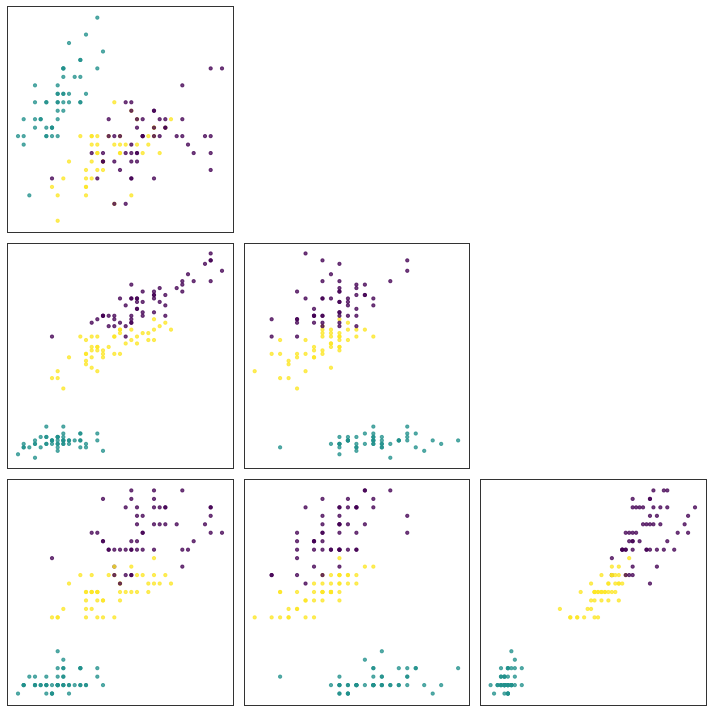

In [10]:
# Plot the clustering in data space.
fig = mpl_utils.corner_scatter(X, s=10, alpha=0.75, figsize=(10, 10), c=hard_associations)

(4, 3)

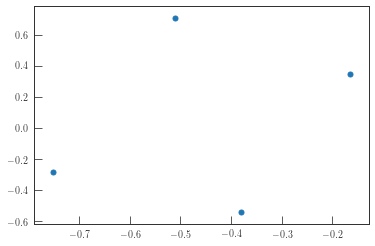

In [11]:
# Plot the factor loads.
A = model.theta_[model.parameter_names.index("A")]
fig, ax = plt.subplots()
ax.scatter(A.T[0], A.T[1])
model.theta_[1].shape


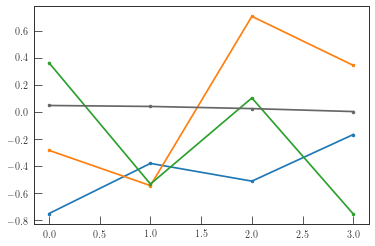

In [12]:
fig, ax = plt.subplots()
for i in range(model.n_latent_factors):
    ax.plot(A.T[i])

psi = model.theta_[model.parameter_names.index("psi")]
ax.plot(psi, c="#666666")

In [ ]:
s